
# Zip Upload

We have 36 geojson files each containing a number of reports with 8 columns. One of them will contain reports of 365 days, and the other 35 will be in 24hr format starting from Jan 1, 2024.

In [1]:
import zipfile
import os
import io
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from datetime import datetime

# Data Preparation

In [2]:
# This is how we upload the data we have
# path to the zip file that contains 35 geojson files
# each of which consists of daily reports of crime
zip_file_path = '../../dataset/24hrs.zip' 

# using the zipfile module we initiate a ZipFile object to read our zip file contents
# this object contains functions like .namelist() that will allow us to interact with the zip file contents
zip_ref = zipfile.ZipFile(zip_file_path,'r')

dataframes = [] # will store all geo data frames here
for filename in zip_ref.namelist():
    geojson = gpd.read_file(io.BytesIO(zip_ref.read(filename)))
    dataframes.append(geojson)
    

## Breaking Down the Code Above (Optional -- Skip this unless you are curious how exactly this works)

In [3]:
# Where is the 24hrz.zip file located ??
# ../../ means go back two directories from the current directory
# The dataset folder is stored there
# So ../../dataset reads inside the dataset folder
# where the 24hrs.zip file is stored
# and that will be our path to the zip file
zip_file_path = '../../dataset/24hrs.zip'

In [4]:
# Here zip_ref will be an instance of the class ZipFile
# It will contain functions that will allow us to interact with the zip file
# For example we can extract the names of files the the zip file contains
# More specifically ZipFile() function has two arguments
# First arguments is the location of the zip file i.e. zip_file_path
# 'r' means read
zip_ref = zipfile.ZipFile(zip_file_path,'r')

In [5]:
# We won't run the whole for loop
# but we do an example of how we would convert of the files in the zipfile into a geo data frame
# Recall that zip_ref was a ZipFile class object
# One of the functions in this class is namelist()
# which does exactly what you think it does
zip_ref.namelist()

['TOPS_24hrs_20240104.geojson',
 'TOPS_24hrs_20240105.geojson',
 'TOPS_24hrs_20240106.geojson',
 'TOPS_24hrs_20240107.geojson',
 'TOPS_24hrs_20240108.geojson',
 'TOPS_24hrs_20240109.geojson',
 'TOPS_24hrs_20240110.geojson',
 'TOPS_24hrs_20240111.geojson',
 'TOPS_24hrs_20240112.geojson',
 'TOPS_24hrs_20240113.geojson',
 'TOPS_24hrs_20240114.geojson',
 'TOPS_24hrs_20240115.geojson',
 'TOPS_24hrs_20240116.geojson',
 'TOPS_24hrs_20240117.geojson',
 'TOPS_24hrs_20240118.geojson',
 'TOPS_24hrs_20240119.geojson',
 'TOPS_24hrs_20240120.geojson',
 'TOPS_24hrs_20240121.geojson',
 'TOPS_24hrs_20240122.geojson',
 'TOPS_24hrs_20240123.geojson',
 'TOPS_24hrs_20240124.geojson',
 'TOPS_24hrs_20240125.geojson',
 'TOPS_24hrs_20240126.geojson',
 'TOPS_24hrs_20240127.geojson',
 'TOPS_24hrs_20240128.geojson',
 'TOPS_24hrs_20240129.geojson',
 'TOPS_24hrs_20240130.geojson',
 'TOPS_24hrs_20240131.geojson',
 'TOPS_24hrs_20240201.geojson',
 'TOPS_24hrs_20240202.geojson',
 'TOPS_24hrs_20240203.geojson',
 'TOPS_2

In [6]:
# Let's convert the first file in the zip file into a geodata frame
first_file = zip_ref.namelist()[0]
first_file

'TOPS_24hrs_20240104.geojson'

In [7]:
# read() is another function in the ZipFile Class
# which will allow us to read the content of the first_file
# which is in Bytes format as indicated by the b' in the beginning
# This is the raw content of the file, exactly as it is stored inside the zip
# and has not yet been saved to the device's file system.
zip_ref.read(first_file)

b'{\n"type": "FeatureCollection",\n"features": [\n{ "type": "Feature", "properties": { "CREATE_TIME_INCIDENT": "2024-01-03 07:33:12", "LOCATION_TEXT": "DUNKIN DONUTS", "BEAT": "SW1", "REPORT_NUMBER": null, "LEGEND2": "505", "DISPO_TEXT": "COMMUNITY POLICING", "OBJECTID": 1 }, "geometry": { "type": "Point", "coordinates": [ -9389282.407999999821186, 3562284.734099999070168 ] } },\n{ "type": "Feature", "properties": { "CREATE_TIME_INCIDENT": "2024-01-03 11:52:40", "LOCATION_TEXT": null, "BEAT": "SE1", "REPORT_NUMBER": null, "LEGEND2": "505", "DISPO_TEXT": "COMMUNITY POLICING", "OBJECTID": 2 }, "geometry": { "type": "Point", "coordinates": [ -9379238.146099999547005, 3546795.255900003015995 ] } },\n{ "type": "Feature", "properties": { "CREATE_TIME_INCIDENT": "2024-01-03 11:53:16", "LOCATION_TEXT": "ST PHILLIPS AME CHURCH", "BEAT": "NE1", "REPORT_NUMBER": null, "LEGEND2": "505", "DISPO_TEXT": "COMMUNITY POLICING", "OBJECTID": 3 }, "geometry": { "type": "Point", "coordinates": [ -9370422.79

In [8]:
# The following creates BytesIO class object
# This is an in-memory stream initialized by the first_file
# Will act like a file in the computer's memory (RAM) rather than in hard drive
# Essentially allowing us to use this Bytes data as if it were a file in the hard drive
# it doesn't write into disk
io.BytesIO(zip_ref.read(first_file))

In [9]:
# We can then read this BytesIO object with geopandas
# There we have our data frame
# Which represents the geojson file in that zip file
# Put this in a for loop
# It will read/store everything in that zipfile in geo data frame format
gpd.read_file(io.BytesIO(zip_ref.read(first_file)))

,CREATE_TIME_INCIDENT,LOCATION_TEXT,BEAT,REPORT_NUMBER,LEGEND2,DISPO_TEXT,OBJECTID,geometry
0,2024-01-03 07:33:12,DUNKIN DONUTS,SW1,None,505,COMMUNITY POLICING,1,POINT (-9389282.40800 3562284.73410)
1,2024-01-03 11:52:40,None,SE1,None,505,COMMUNITY POLICING,2,POINT (-9379238.14610 3546795.25590)
2,2024-01-03 11:53:16,ST PHILLIPS AME CHURCH,NE1,None,505,COMMUNITY POLICING,3,POINT (-9370422.79120 3573044.32780)
3,2024-01-03 15:06:07,None,SW3,None,145,THEFT - GRAND,4,POINT (-9384258.65290 3551920.61570)
4,2024-01-03 15:15:23,CANOPY OAKS ELEMENTARY SCHOOL,NW1,None,505,COMMUNITY POLICING,5,POINT (-9389443.01420 3569293.67900)
...,...,...,...,...,...,...,...,...
368,2024-01-03 12:54:51,BAYMONTE SUITES,3,None,152,SUSPICIOUS,369,POINT (-9385958.94570 3566153.21940)
369,2024-01-03 15:16:13,None,7,2024-00001480,303,CRASH - HIT & RUN,370,POINT (-9382080.08030 3559651.13840)
370,2024-01-03 15:18:22,PUBLIX SUPER MARKET,14,2024-00001482,148,TRESPASS WARNING,371,POINT (-9386292.67810 3560955.94980)
371,2024-01-03 17:51:27,None,2,2024-00001552,302,CRASH WITH INJURIES,372,POINT (-9373087.93010 3570271.08990)


## merge Function

There's a built in function to merge geodata frames, namely 'pd.concat()'. This will take as input a list containing the geo-data frames representing each geojson file. It will merge all and output as one geo-data frame.

In [10]:
def merge(list_of_geodataframes):
    MERGEDALL = gpd.pd.concat(list_of_geodataframes,ignore_index = True)
    return MERGEDALL

## 2023 Yearly Data

One file contains every day from 2023. We will merge it with what we have from 2024. It was not part of the zip file.

In [11]:
# The file's name is TOPS 365days Jan3
# This time all we need is the path of the file
file_path = '../../dataset/TOPS 365days Jan 3.geojson'
file_path

'../../dataset/TOPS 365days Jan 3.geojson'

In [12]:
# Convert it to geo data frame
gdf_2023 = gpd.read_file(file_path)


In [13]:
# A first look at the dataset from 2023
gdf_2023

,CREATE_TIME_INCIDENT,LOCATION_TEXT,BEAT,REPORT_NUMBER,LEGEND2,DISPO_TEXT,OBJECTID,geometry
0,2023-11-10 21:12:47,None,18,2023-00196053,122,DISORDERLY INTOXICATION,1,POINT (-9386627.75200 3565111.39140)
1,2023-08-31 01:41:41,None,17,None,152,SUSPICIOUS,2,POINT (-9388266.65440 3561752.12860)
2,2023-08-01 16:23:09,None,4,2023-00132523,104,AUTO THEFT,3,POINT (-9376397.42740 3566294.16600)
3,2023-09-01 00:20:51,PLANTATION CONDOS,14,None,152,SUSPICIOUS,4,POINT (-9386699.50640 3560238.44430)
4,2023-09-29 17:56:38,None,8,2023-00170694,302,CRASH WITH INJURIES,5,POINT (-9376069.55250 3558656.45000)
...,...,...,...,...,...,...,...,...
149210,2023-12-26 22:35:06,VENETIAN VILLAS APTS,14,None,505,COMMUNITY POLICING,149211,POINT (-9386126.17420 3560137.28670)
149211,2023-12-26 05:55:10,ACTS CHURCH,NW1,None,505,COMMUNITY POLICING,149212,POINT (-9387388.17550 3568401.81670)
149212,2023-12-26 06:10:36,None,NW1,None,504,COMMUNITY POLICING,149213,POINT (-9382084.01440 3567042.38750)
149213,2023-12-26 14:14:51,None,NE1,None,159,MISC SERVICE CALL,149214,POINT (-9366901.03320 3576978.28410)


Let's merge all of them.

In [14]:
# Append the 2023 data to the current list
# In fact insert to the beginning
dataframes.insert(0,gdf_2023)

In [15]:
# All 36 of them are in this list now
len(dataframes)

36

In [16]:
# Merge all of them to make one giant geo data frame
MERGEDALL = merge(dataframes)

# Histogram Functions

We will define histogram functions that will display histograms for daily, weekly and montly bins.

In [17]:
def HistogramMonthly(DataFrame):
    create_time_incident = DataFrame.columns[0] #This should be the Create Time Incident Column
    date_counts = DataFrame[create_time_incident].dt.date.value_counts() #Returns a series of time incident <--> number of occurences
    date_counts_sorted = date_counts.sort_index()#sorts it with respect to date
   # Convert the index to datetime to ensure proper grouping
    date_counts_sorted.index = pd.to_datetime(date_counts_sorted.index)
    # Group by year and month, and sum the counts for each month
    monthly_counts = date_counts_sorted.groupby([date_counts_sorted.index.year, date_counts_sorted.index.month]).sum()

    # Plotting the histogram with monthly bins
    monthly_counts.plot(kind='bar', figsize=(15, 7))

    plt.title('Number of Incidents per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to show them more clearly
    plt.tight_layout()  # Adjust the layout so everything fits without overlapping

    # plt.show()

    

In [18]:
def HistogramWeekly(DataFrame):
    create_time_incident = DataFrame.columns[0]  # This should be the Create Time Incident Column
    date_counts = DataFrame[create_time_incident].dt.date.value_counts()  # Returns a series of time incident <--> number of occurrences
    date_counts_sorted = date_counts.sort_index()  # sorts it with respect to date
    
    # Convert the index to datetime to ensure proper grouping
    date_counts_sorted.index = pd.to_datetime(date_counts_sorted.index)
    
    # Group by year and week, and sum the counts for each week
    weekly_counts = date_counts_sorted.resample('W').sum()
    
    # Plotting the histogram with weekly bins
    weekly_counts.plot(kind='bar', figsize=(15, 7))
    
    plt.title('Number of Incidents per Week')
    plt.xlabel('Week')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to show them more clearly
    plt.tight_layout()  # Adjust the layout so everything fits without overlapping
    
    # plt.show()

# Now you can call this function passing any DataFrame that has a datetime column as the first column
# For example:
# HistogramWeekly(gdf[34])


In [19]:
def HistogramDaily(DataFrame):
    create_time_incident = DataFrame.columns[0]  # This should be the Create Time Incident Column
    date_counts = DataFrame[create_time_incident].dt.date.value_counts()  # Returns a series of time incident <--> number of occurrences
    date_counts_sorted = date_counts.sort_index()  # sorts it with respect to date
    
    # Convert the index to datetime to ensure proper grouping
    date_counts_sorted.index = pd.to_datetime(date_counts_sorted.index)
    
    # Group by day and sum the counts for each day
    daily_counts = date_counts_sorted.resample('D').sum()
    
    # Plotting the histogram with daily bins
    daily_counts.plot(kind='bar', figsize=(15, 7))
    
    plt.title('Number of Incidents per Day')
    plt.xlabel('Day')
    plt.ylabel('Number of Incidents')
    plt.xticks([])  # Remove x-axis labels to avoid clutter
    plt.tight_layout()  # Adjust the layout so everything fits without overlapping
    
    # plt.show()

# You would call this function with a DataFrame like so:
# HistogramDaily(gdfs[35])


# Introductory Analysis

MERGEDALL contain all data we have.

Here's a first look at it. There are about 160000 crime reports. Each crime report contains 8 different information. Most important ones are
1. CREATE_TIME_INCIDENT >> When it happened/reported e.g. 2023-11-10 21:12:47	
2. LOCATION_TEXT >>> Where it happened/reported e.g. CIRCLE K ,Walmart etc.
3. DISPO_TEXT >>> Type of the crime e.g. AUTO THEFT, SUSPICIOUS, ELDER ABUSE etc.
4. Geometry >>> Sometimes LOCATION_TEXT is not available. Geometry column will provide coordinate location e.g.(-9386627.75200 3565111.39140) . Maybe the incident took place in the middle of nowhere.

In [20]:
MERGEDALL

,CREATE_TIME_INCIDENT,LOCATION_TEXT,BEAT,REPORT_NUMBER,LEGEND2,DISPO_TEXT,OBJECTID,geometry
0,2023-11-10 21:12:47,None,18,2023-00196053,122,DISORDERLY INTOXICATION,1,POINT (-9386627.75200 3565111.39140)
1,2023-08-31 01:41:41,None,17,None,152,SUSPICIOUS,2,POINT (-9388266.65440 3561752.12860)
2,2023-08-01 16:23:09,None,4,2023-00132523,104,AUTO THEFT,3,POINT (-9376397.42740 3566294.16600)
3,2023-09-01 00:20:51,PLANTATION CONDOS,14,None,152,SUSPICIOUS,4,POINT (-9386699.50640 3560238.44430)
4,2023-09-29 17:56:38,None,8,2023-00170694,302,CRASH WITH INJURIES,5,POINT (-9376069.55250 3558656.45000)
...,...,...,...,...,...,...,...,...
161193,2024-01-28 13:47:23,AENON BAPTIST CHURCH,SW1,None,505,COMMUNITY POLICING,331,POINT (-9393031.19420 3559657.23630)
161194,2024-01-28 20:29:36,AMAZON FULFILLMENT CENTER,NE4,None,505,COMMUNITY POLICING,332,POINT (-9369634.07030 3566571.91980)
161195,2024-01-28 20:31:11,None,SE2,None,152,SUSPICIOUS,333,POINT (-9366706.13170 3555347.64320)
161196,2024-01-28 20:36:09,None,SW3,None,159,MISC SERVICE CALL,334,POINT (-9382658.75470 3553705.96660)


## Create Time Incident Monthly Exploration

The dataset ranges from 2023-01-02 to 2024-01-29 including reports from 393 days.

In [21]:
CTI = MERGEDALL['CREATE_TIME_INCIDENT'].dt.date.value_counts().sort_index()
CTI

CREATE_TIME_INCIDENT
2023-01-02      41
2023-01-03     457
2023-01-04     363
2023-01-05     462
2023-01-06     460
              ... 
2024-01-25     331
2024-01-26     958
2024-01-27    1602
2024-01-28    1265
2024-01-29     410
Name: count, Length: 393, dtype: int64

The number of incidents on average per month is 12399.

In [22]:
CTI.index = pd.to_datetime(CTI.index) # This is needed to use resample method allowing us to resample dates by the day, week or month, year etc.
Monthly_CTI = CTI.resample('M').sum()
Monthly_mean = int(np.mean(Monthly_CTI)) #check the mean
Monthly_mean

12399

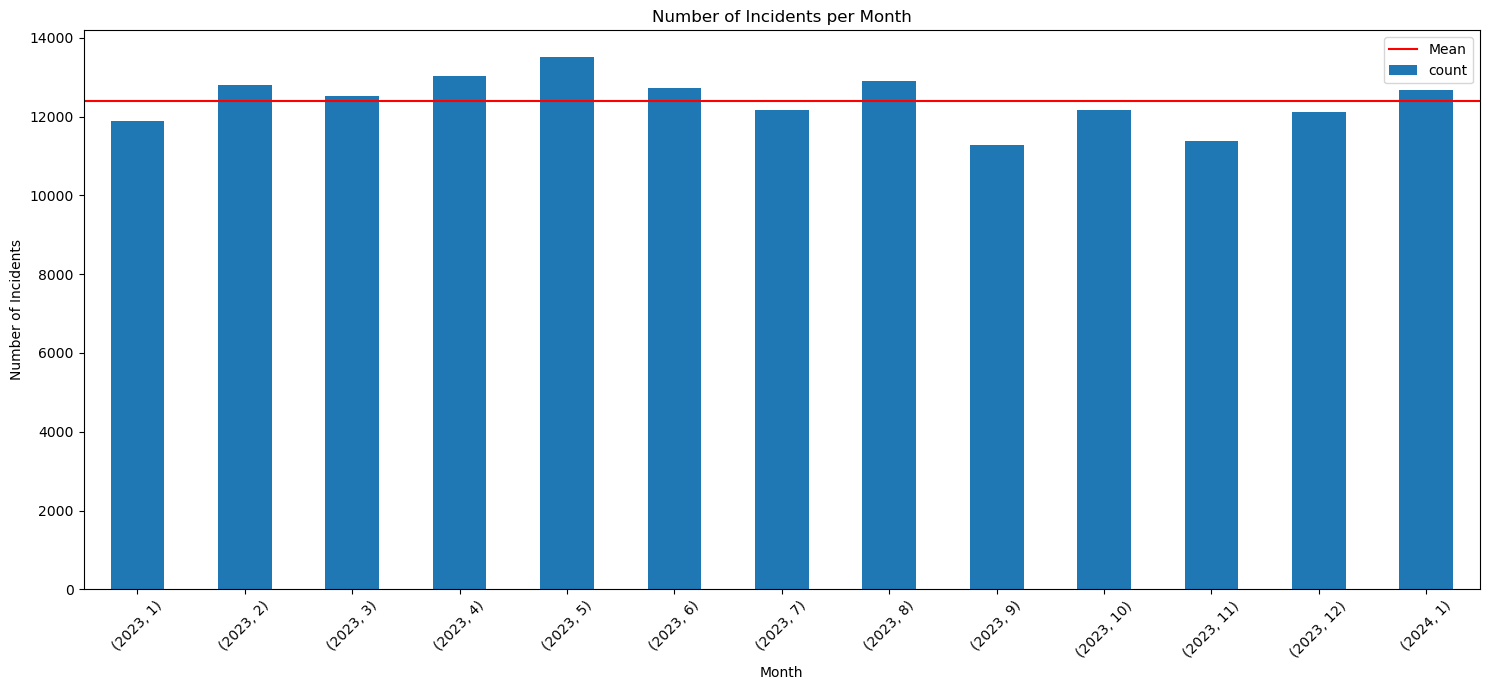

In [23]:
# Number of incidents occured per month
HistogramMonthly(MERGEDALL)
plt.axhline(y = Monthly_mean,color='r',label='Mean')
plt.legend()
plt.show()

## Create Time Incident Weekly Exploration

The number of incidents on average per week is 2828.

In [24]:
weekly_CTI = CTI.resample('W').sum()
weekly_mean = np.mean(weekly_CTI)
int(weekly_mean)

2828

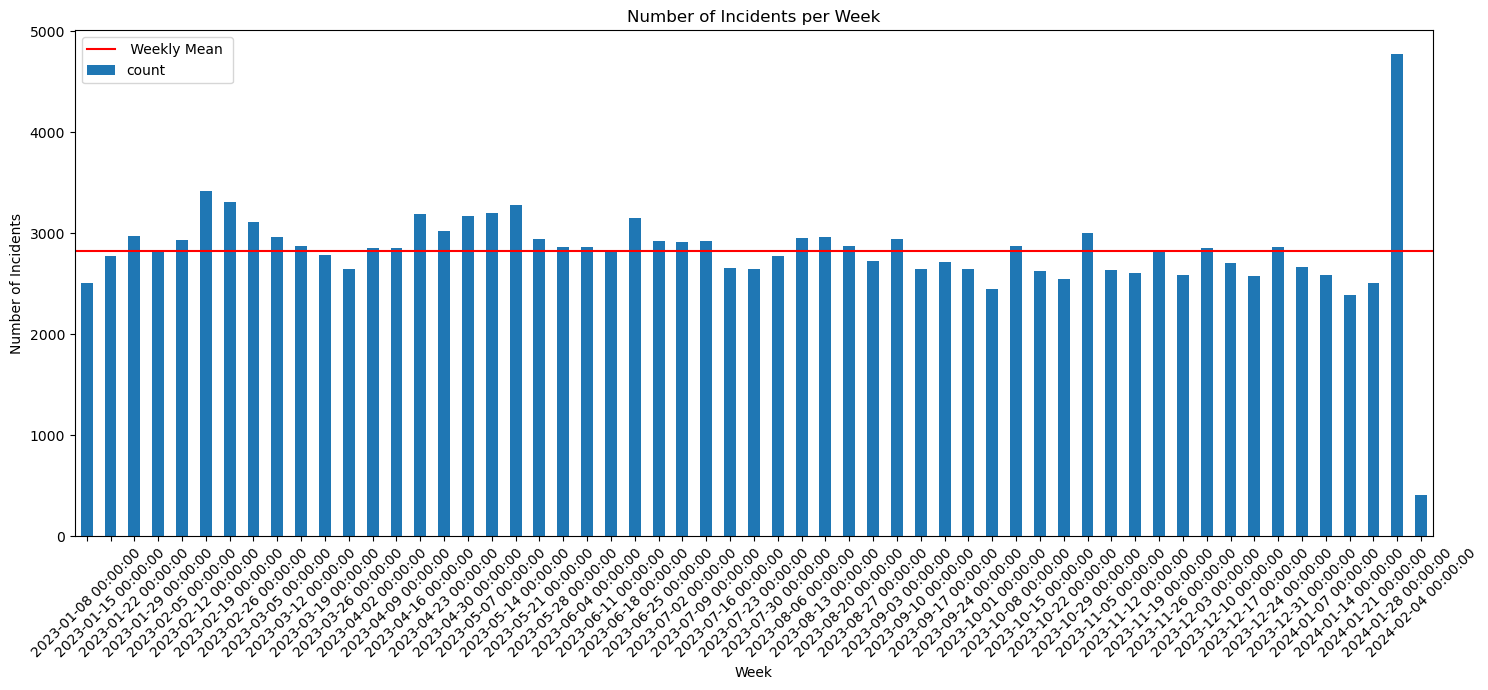

In [25]:
# Number of incidents occured per week
HistogramWeekly(MERGEDALL)
plt.axhline(y = weekly_mean, color= 'r', label = ' Weekly Mean ' )
plt.legend()
plt.show()

## Create Time Incident Daily Exploration

The number of incidents on average per day is 410.

In [26]:
daily_CTI = CTI.resample('D').sum()
daily_mean = np.mean(daily_CTI)
int(daily_mean)

410

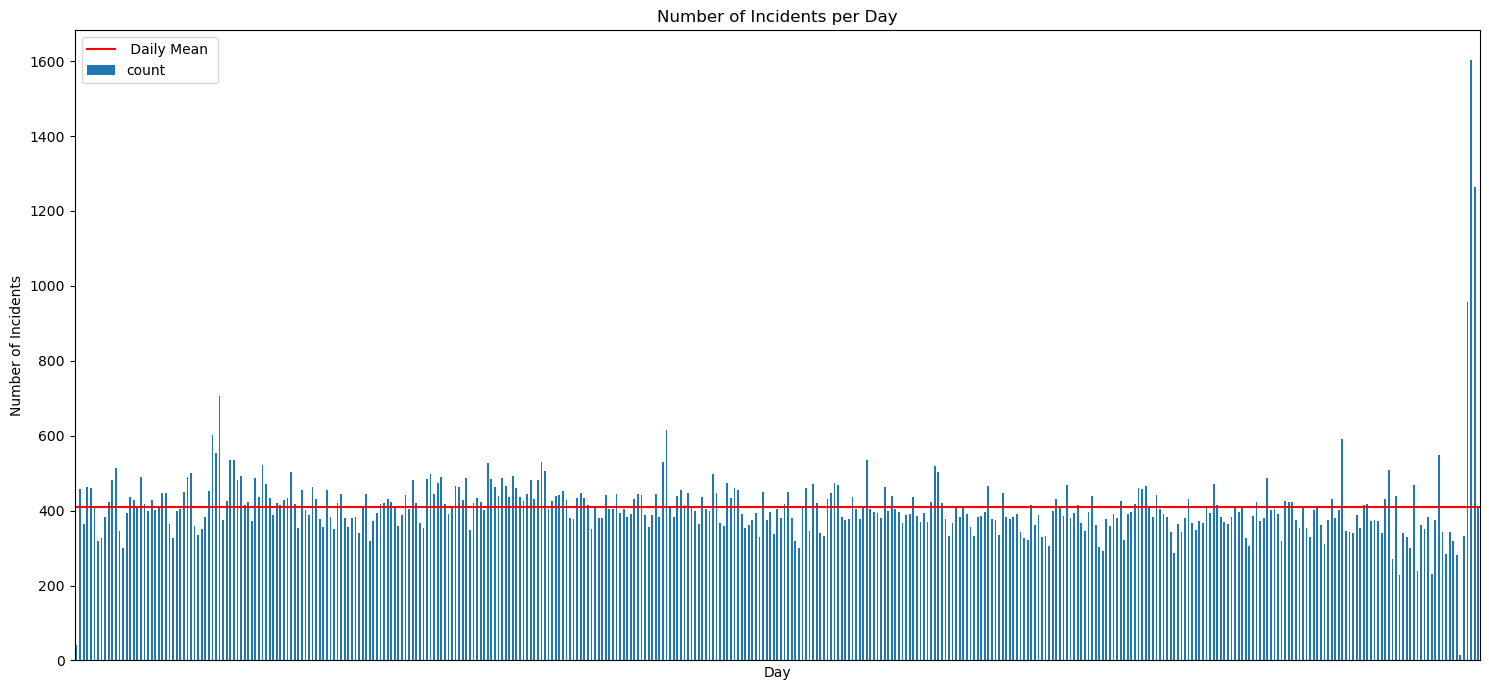

In [27]:
# Number of incidents occurred per day
HistogramDaily(MERGEDALL)
plt.axhline( y = daily_mean, color = 'r', label= ' Daily Mean ' )
plt.legend()
plt.show()

## Create Time Incident Hourly Exploration

There are on average 17 incidents every hour.

In [28]:
hourly_CTI = CTI.resample('H').sum()
int(hourly_CTI.mean())

17

## Extract Days with the Maximum number of incidents

In [29]:
# This will give a pandas series object
# Right now in descending order
# If you want to sort by date pass .sort_index() at the end

IncidentNumbersDescending = MERGEDALL['CREATE_TIME_INCIDENT'].dt.date.value_counts()
IncidentNumbersDescending

CREATE_TIME_INCIDENT
2024-01-27    1602
2024-01-28    1265
2024-01-26     958
2023-02-11     705
2023-06-16     615
              ... 
2024-01-12     238
2024-01-16     230
2024-01-07     227
2023-01-02      41
2024-01-24      15
Name: count, Length: 393, dtype: int64

In [30]:
# To extract the date that corresponds to the maximum number of incidents
# Use the idxmax() method
# Similarly use idxmin() to find the date with the least number if incidents
max_day = IncidentNumbersDescending.idxmax()
min_day = IncidentNumbersDescending.idxmin()
print('The day that corresponds to the maximum number of incidents is', max_day)
print('The day that corresponds to the minimum number of incidents is',min_day)

The day that corresponds to the maximum number of incidents is 2024-01-27
The day that corresponds to the minimum number of incidents is 2024-01-24


In [31]:
## Turn this into a function for later use
def MaxMinIncidentDay(PandaFrame):
    column = PandaFrame.columns[0] #CREATE_TIME_INCIDENT COLUMN
    IncidentNumbersDescending = PandaFrame[column].dt.date.value_counts()
    max_day = IncidentNumbersDescending.idxmax()
    min_day = IncidentNumbersDescending.idxmin()
    
    return (max_day,min_day)
    

In [32]:
# Example usage
# First and second components correspond to max and min dates respectively
MaxMinIncidentDay(MERGEDALL)

(datetime.date(2024, 1, 27), datetime.date(2024, 1, 24))

## Extract Weeks That Correspond to the Maximum and Minimum number of Incidents

In [33]:
# Convert the index to a DateTimeIndex
IncidentNumbersDescending.index = pd.to_datetime(IncidentNumbersDescending.index)
IncidentNumbersDescending.index

DatetimeIndex(['2024-01-27', '2024-01-28', '2024-01-26', '2023-02-11',
               '2023-06-16', '2023-02-09', '2023-12-22', '2023-02-10',
               '2024-01-18', '2023-02-15',
               ...
               '2023-10-16', '2023-11-05', '2024-01-20', '2024-01-23',
               '2024-01-05', '2024-01-12', '2024-01-16', '2024-01-07',
               '2023-01-02', '2024-01-24'],
              dtype='datetime64[ns]', name='CREATE_TIME_INCIDENT', length=393, freq=None)

In [34]:
# Resample to weekly frequency, summing the number of incidents.
weekly_incidents = IncidentNumbersDescending.resample('W').sum()
weekly_incidents

CREATE_TIME_INCIDENT
2023-01-08    2512
2023-01-15    2773
2023-01-22    2975
2023-01-29    2823
2023-02-05    2934
2023-02-12    3418
2023-02-19    3313
2023-02-26    3109
2023-03-05    2966
2023-03-12    2871
2023-03-19    2788
2023-03-26    2645
2023-04-02    2854
2023-04-09    2859
2023-04-16    3196
2023-04-23    3025
2023-04-30    3173
2023-05-07    3200
2023-05-14    3280
2023-05-21    2945
2023-05-28    2868
2023-06-04    2867
2023-06-11    2831
2023-06-18    3153
2023-06-25    2926
2023-07-02    2912
2023-07-09    2927
2023-07-16    2659
2023-07-23    2652
2023-07-30    2779
2023-08-06    2954
2023-08-13    2965
2023-08-20    2874
2023-08-27    2730
2023-09-03    2945
2023-09-10    2643
2023-09-17    2721
2023-09-24    2652
2023-10-01    2451
2023-10-08    2871
2023-10-15    2625
2023-10-22    2545
2023-10-29    3001
2023-11-05    2634
2023-11-12    2608
2023-11-19    2812
2023-11-26    2589
2023-12-03    2855
2023-12-10    2710
2023-12-17    2578
2023-12-24    2869
2023-12-31

In [35]:
# Now find the week with the maximum number of incidents.
max_incidents_week = weekly_incidents.idxmax()
# max_incidents_week will contain the first day of the week with the maximum number of incidents.
print(max_incidents_week)

2024-01-28 00:00:00


In [36]:
# Similarly find the week with the minumum number of incidents
min_incidents_week = weekly_incidents.idxmin()
# min_incidents_week will contain the first day of the week with the minimum number of incidents.
print(min_incidents_week)

2024-02-04 00:00:00


In [37]:
# Make a function for this for later use
def MaxMinIncidentWeek(PandaFrame):
    column = PandaFrame.columns[0] #CREATE_TIME_INCIDENT COLUMN
    IncidentNumbersDescending = PandaFrame[column].dt.date.value_counts()
    # Convert the index to a DateTimeIndex
    IncidentNumbersDescending.index = pd.to_datetime(IncidentNumbersDescending.index)
    # Resample to weekly frequency, summing the number of incidents.
    weekly_incidents = IncidentNumbersDescending.resample('W').sum()
    # Now find the week with the maximum number of incidents.
    max_incidents_week = weekly_incidents.idxmax()
    # Similarly find the week with the minumum number of incidents
    min_incidents_week = weekly_incidents.idxmin()
    
    return (max_incidents_week,min_incidents_week)
    

In [38]:
#Example Usage
MaxMinIncidentWeek(MERGEDALL)

(Timestamp('2024-01-28 00:00:00'), Timestamp('2024-02-04 00:00:00'))

## Extract Months That Correspond to the Maximum and Minimum number of Incidents

In [39]:
# Make a function that will extract months that corresponds to max and min number of incidents
def MaxMinIncidentMonth(PandaFrame):
    column = PandaFrame.columns[0] #CREATE_TIME_INCIDENT COLUMN
    IncidentNumbersDescending = PandaFrame[column].dt.date.value_counts()
    # Convert the index to a DateTimeIndex
    IncidentNumbersDescending.index = pd.to_datetime(IncidentNumbersDescending.index)
    # Resample to weekly frequency, summing the number of incidents.
    monthly_incidents = IncidentNumbersDescending.resample('M').sum()
    # Now find the week with the maximum number of incidents.
    max_incidents_month = monthly_incidents.idxmax()
    # Similarly find the week with the minumum number of incidents
    min_incidents_month = monthly_incidents.idxmin()
    
    return (max_incidents_month,min_incidents_month)


In [40]:
# Example Usage
MaxMinIncidentMonth(MERGEDALL)


(Timestamp('2023-05-31 00:00:00'), Timestamp('2023-09-30 00:00:00'))

## Make a General Function for Extracting Hourly, Daily, Weekly or Monthly Information

In [41]:
def MaxMin(PandaFrame,sampleby = 'D'): #default is daily
    column = PandaFrame.columns[0] #CREATE_TIME_INCIDENT COLUMN
    IncidentNumbersDescending = PandaFrame[column].dt.date.value_counts()
    # Convert the index to a DateTimeIndex
    IncidentNumbersDescending.index = pd.to_datetime(IncidentNumbersDescending.index)
    # Resample to weekly frequency, summing the number of incidents.
    n_incidents = IncidentNumbersDescending.resample(sampleby).sum()
    # Now find the week with the maximum number of incidents.
    max_incidents= n_incidents.idxmax().date()
    # Similarly find the week with the minumum number of incidents
    min_incidents = n_incidents.idxmin().date()
    
    return (max_incidents,min_incidents)
    

In [42]:
# Example Usage
MaxMin(MERGEDALL,sampleby='H')

(datetime.date(2024, 1, 27), datetime.date(2023, 1, 2))

In [43]:
# Daily max min
MaxMin(MERGEDALL)

(datetime.date(2024, 1, 27), datetime.date(2024, 1, 24))

In [44]:
# Weekly Max Min
MaxMin(MERGEDALL,sampleby='W')

(datetime.date(2024, 1, 28), datetime.date(2024, 2, 4))

In [45]:
# Montly Max Min
MaxMin(MERGEDALL,sampleby='M')

(datetime.date(2023, 5, 31), datetime.date(2023, 9, 30))

## Hourly Look at the Dates with the Maximum number of incidents and The Minimum number of incidents respectively

In [46]:
# First we will look at the number of incidences for each date
CTI = MERGEDALL['CREATE_TIME_INCIDENT'].dt.date.value_counts().sort_index()
CTI

CREATE_TIME_INCIDENT
2023-01-02      41
2023-01-03     457
2023-01-04     363
2023-01-05     462
2023-01-06     460
              ... 
2024-01-25     331
2024-01-26     958
2024-01-27    1602
2024-01-28    1265
2024-01-29     410
Name: count, Length: 393, dtype: int64

Let's look at the two extreme days. One day with the maximum number of incidents and the other with the minimum. Notice how they are 3 days apart.

In [47]:
max_day , min_day = MaxMin(MERGEDALL) # get the dates for the max and min number of incidents
max_n_incidents = np.max(CTI) # get the number of incidents on the date with the max number of incidents
min_n_incidents = np.min(CTI) # get the number of incidents on the date with the min number of incidents
print('The date with the maximum number of incidents is ',max_day,'. Number of incidents = ',max_n_incidents)
print('The date with the minimum number of incidents is ',min_day,'. Number of incidents = ',min_n_incidents)

The date with the maximum number of incidents is  2024-01-27 . Number of incidents =  1602
The date with the minimum number of incidents is  2024-01-24 . Number of incidents =  15


In [48]:
# Get these two dates from the MERGEDALL dataset
# .dt.date ensures the hour is ignored when extracting the date
jan27_2024 = MERGEDALL[MERGEDALL['CREATE_TIME_INCIDENT'].dt.date == max_day] # has all the rows from MERGEDALL corresponding to max day
jan24_2024 = MERGEDALL[MERGEDALL['CREATE_TIME_INCIDENT'].dt.date == min_day]  # has all the rows from MERGEDALL corresponding to min day

In [49]:
# Set the indexing to Time incident
# This way we can resample by the hour
jan27_2024.set_index('CREATE_TIME_INCIDENT',inplace = True)
jan24_2024.set_index('CREATE_TIME_INCIDENT',inplace = True)

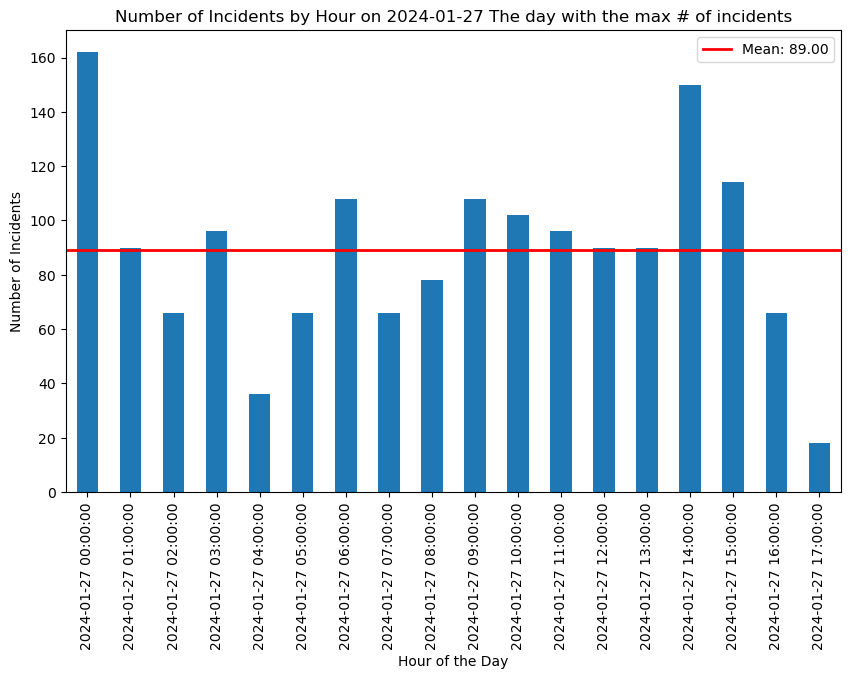

In [50]:
# Resample by hour and count the number of incidents
hourly_counts_27 = jan27_2024.resample('H').size()

# Plot the bar chart
hourly_counts_27.plot(kind='bar', figsize=(10, 6))

# Calculate the mean number of incidents
mean_incidents_27 = hourly_counts_27.mean()

# Add a red horizontal line to indicate the mean
plt.axhline(y = mean_incidents_27, color='r', linestyle='-', linewidth=2, label=f'Mean: {mean_incidents_27:.2f}')

# Add legend to the plot
plt.legend()

# Set the title and labels
plt.title('Number of Incidents by Hour on 2024-01-27 The day with the max # of incidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')

# Show the plot
plt.show()

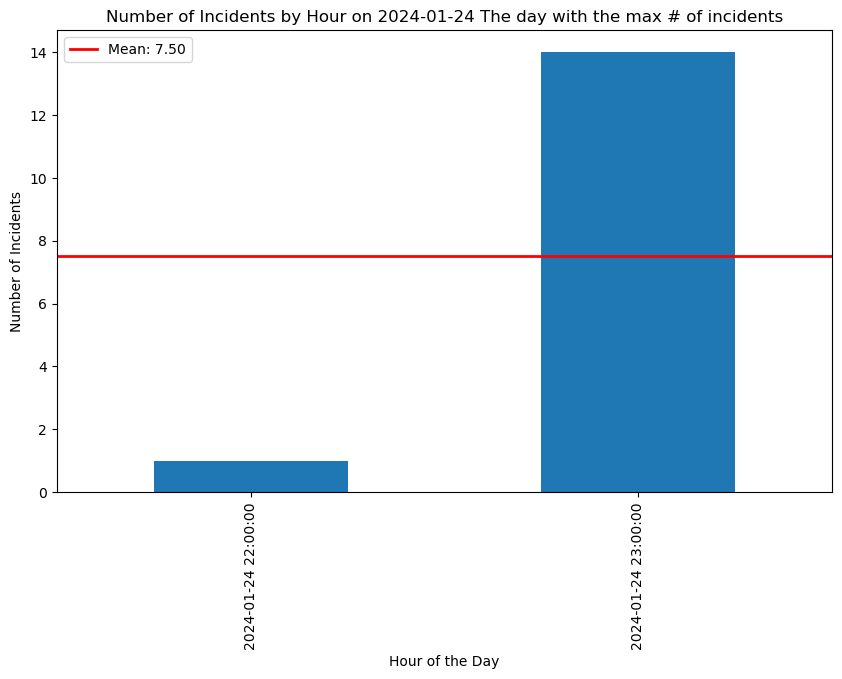

In [51]:
# Resample by hour and count the number of incidents
hourly_counts_24 = jan24_2024.resample('H').size()

# Plot the bar chart
hourly_counts_24.plot(kind='bar', figsize=(10, 6))

# Calculate the mean number of incidents
mean_incidents_24 = hourly_counts_24.mean()

# Add a red horizontal line to indicate the mean
plt.axhline(y = mean_incidents_24, color='r', linestyle='-', linewidth=2, label=f'Mean: {mean_incidents_24:.2f}')

# Add legend to the plot
plt.legend()

# Set the title and labels

plt.title('Number of Incidents by Hour on 2024-01-24 The day with the max # of incidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')

# Show the plot
plt.show()

In [72]:
MERGEDALL[MERGEDALL['LOCATION_TEXT']== 'SHELL GAS - VINEYARDS']

,CREATE_TIME_INCIDENT,LOCATION_TEXT,BEAT,REPORT_NUMBER,LEGEND2,DISPO_TEXT,OBJECTID,geometry
46,2023-02-21 15:53:37,SHELL GAS - VINEYARDS,NE4,None,505,COMMUNITY POLICING,47,POINT (-9369417.95800 3565574.30090)
228,2023-02-22 01:59:11,SHELL GAS - VINEYARDS,NE4,None,505,COMMUNITY POLICING,229,POINT (-9369417.95800 3565574.30090)
318,2023-02-23 03:50:32,SHELL GAS - VINEYARDS,NE4,None,505,COMMUNITY POLICING,319,POINT (-9369417.95800 3565574.30090)
474,2023-02-24 01:43:51,SHELL GAS - VINEYARDS,NE4,None,505,COMMUNITY POLICING,475,POINT (-9369417.95800 3565574.30090)
611,2023-01-11 22:45:03,SHELL GAS - VINEYARDS,NE4,None,505,COMMUNITY POLICING,612,POINT (-9369417.95800 3565574.30090)
...,...,...,...,...,...,...,...,...
159779,2024-01-28 20:26:58,SHELL GAS - VINEYARDS,NE4,None,505,COMMUNITY POLICING,315,POINT (-9369417.95800 3565574.30090)
160057,2024-01-29 02:12:50,SHELL GAS - VINEYARDS,NE4,None,505,COMMUNITY POLICING,258,POINT (-9369417.95800 3565574.30090)
160114,2024-01-28 20:26:58,SHELL GAS - VINEYARDS,NE4,None,505,COMMUNITY POLICING,315,POINT (-9369417.95800 3565574.30090)
161120,2024-01-29 02:12:50,SHELL GAS - VINEYARDS,NE4,None,505,COMMUNITY POLICING,258,POINT (-9369417.95800 3565574.30090)


In [69]:
MERGEDALL.iloc[46]

CREATE_TIME_INCIDENT                        2023-02-21 15:53:37
LOCATION_TEXT                             SHELL GAS - VINEYARDS
BEAT                                                        NE4
REPORT_NUMBER                                              None
LEGEND2                                                     505
DISPO_TEXT                                   COMMUNITY POLICING
OBJECTID                                                     47
geometry                POINT (-9369417.958 3565574.3008999974)
Name: 46, dtype: object

In [67]:
# Check if LOCATION_TEXT contains 'S', case-insensitive
contains_s = MERGEDALL['LOCATION_TEXT'].str.contains('Shell', case=False, regex=True)

contains_s[contains_s == True]
# # Filter the DataFrame based on the condition
# filtered_df = MERGEDALL[contains_s]


46        True
228       True
318       True
468       True
474       True
          ... 
160094    True
160114    True
161120    True
161157    True
161177    True
Name: LOCATION_TEXT, Length: 728, dtype: object

## Hourly look at any Date

In [421]:
def HistogramHourly(DateObject,DataFrame):
    clm = DataFrame.columns[0]
    df = DataFrame[DataFrame[clm].dt.date == DateObject] # extracts the rows of the desired date from the data frame
    df.set_index(clm,inplace = True)
    hourly_counts = df.resample('H').size()
    hourly_counts.plot(kind='bar')


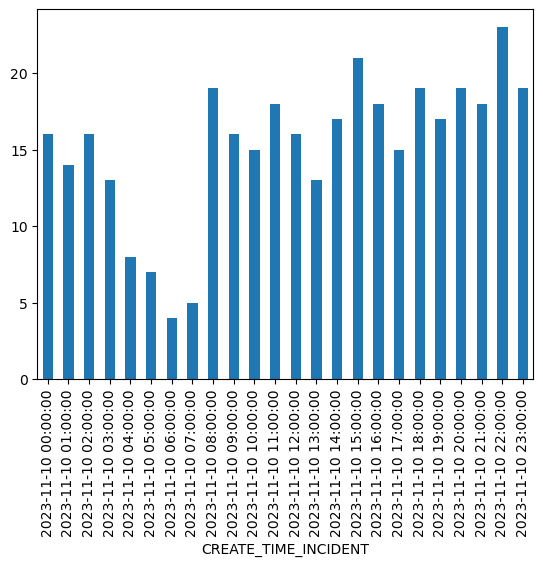

In [428]:
# Sample usage
day  = MERGEDALL['CREATE_TIME_INCIDENT'].dt.date[0] #2023-11-10
HistogramHourly(day,MERGEDALL)

# Comments Feb 21 

1. Plot bar chart for tyoes of reports Community Policing Theft
2. What happened with the outliers. Look at the news on those days. Was there a football game on those days?
3. Do Plot for each hour
4. BAR CHART FOR LOCATION

# Bar Charts for types of Reports

In [74]:
MERGEDALL

,CREATE_TIME_INCIDENT,LOCATION_TEXT,BEAT,REPORT_NUMBER,LEGEND2,DISPO_TEXT,OBJECTID,geometry
0,2023-11-10 21:12:47,None,18,2023-00196053,122,DISORDERLY INTOXICATION,1,POINT (-9386627.75200 3565111.39140)
1,2023-08-31 01:41:41,None,17,None,152,SUSPICIOUS,2,POINT (-9388266.65440 3561752.12860)
2,2023-08-01 16:23:09,None,4,2023-00132523,104,AUTO THEFT,3,POINT (-9376397.42740 3566294.16600)
3,2023-09-01 00:20:51,PLANTATION CONDOS,14,None,152,SUSPICIOUS,4,POINT (-9386699.50640 3560238.44430)
4,2023-09-29 17:56:38,None,8,2023-00170694,302,CRASH WITH INJURIES,5,POINT (-9376069.55250 3558656.45000)
...,...,...,...,...,...,...,...,...
161193,2024-01-28 13:47:23,AENON BAPTIST CHURCH,SW1,None,505,COMMUNITY POLICING,331,POINT (-9393031.19420 3559657.23630)
161194,2024-01-28 20:29:36,AMAZON FULFILLMENT CENTER,NE4,None,505,COMMUNITY POLICING,332,POINT (-9369634.07030 3566571.91980)
161195,2024-01-28 20:31:11,None,SE2,None,152,SUSPICIOUS,333,POINT (-9366706.13170 3555347.64320)
161196,2024-01-28 20:36:09,None,SW3,None,159,MISC SERVICE CALL,334,POINT (-9382658.75470 3553705.96660)


In [75]:
# The number of kinds of reports
len(MERGEDALL['DISPO_TEXT'].unique())

67

In [76]:
# Here's the list of all kinds of reports
MERGEDALL['DISPO_TEXT'].unique()

array(['DISORDERLY INTOXICATION', 'SUSPICIOUS ', 'AUTO THEFT',
       'CRASH WITH INJURIES', 'THEFT - PETIT', 'COMMUNITY POLICING',
       'MISC SERVICE CALL', 'TRESPASS WARNING', 'WANTED PERSON',
       'BATTERY', 'BURGLARY - RESIDENTIAL', 'CRASH W/O INJURIES', 'FRAUD',
       'CRASH - HIT & RUN', 'EXTORTION', 'TRESPASSING',
       'CRIMINAL MISCHIEF', 'STALKING', 'SEXUAL BATTERY',
       'DRUG VIOLATION', 'THEFT - GRAND', 'DISORDERLY CONDUCT',
       'LOUD NOISE / MUSIC', 'SUSPICIOUS PACKAGE',
       'BURGLARY - COMMERCIAL', 'WEAPONS VIOLATION', 'CHILD ABUSE',
       'TRAFFIC', 'OBSCENE PHONE CALLS', 'LOITERING / PROWLING',
       'BURGLARY - AUTO', 'INDECENT EXPOSURE', 'RECOVERED PROP',
       'ANIMAL ABUSE', 'LEWD & LASCIVIOUS', 'ADMIN',
       'AUTO THEFT RECOVERY', '911 HANGUP', 'GAMBLING', 'ASSAULT',
       'AGG BATTERY', 'BEV/ALC VIOLATION', 'RESISTING LEO',
       'CITY ORD VIOLATION', 'AGG ASSAULT', 'DUI', 'ROBBERY - CARJACKING',
       'UNDERAGE ALC POSS', 'ARSON', 'ROBBERY 

In [77]:
MERGEDALL['DISPO_TEXT'].value_counts()

DISPO_TEXT
COMMUNITY POLICING    59299
MISC SERVICE CALL     29780
SUSPICIOUS            24031
CRASH W/O INJURIES     7159
TRESPASSING            5387
                      ...  
BEV/ALC VIOLATION         5
HOMICIDE                  5
DUI: .02                  3
BOMB                      2
BOMB THREAT               1
Name: count, Length: 67, dtype: int64

In [78]:
# Let's assume 's' is the series obtained from value_counts()
s = MERGEDALL['DISPO_TEXT'].value_counts()

# Convert the series to a DataFrame and reset the index
df = s.reset_index()
df.columns = ['DISPO_TEXT', 'count']  # Rename the columns appropriately

# Now 'df' should have the structure you want
df


,DISPO_TEXT,count
0,COMMUNITY POLICING,59299
1,MISC SERVICE CALL,29780
2,SUSPICIOUS,24031
3,CRASH W/O INJURIES,7159
4,TRESPASSING,5387
...,...,...
62,BEV/ALC VIOLATION,5
63,HOMICIDE,5
64,DUI: .02,3
65,BOMB,2


Do seperate analysis for community policing with and without that. Train with and without.

Convert the following into a log plot.

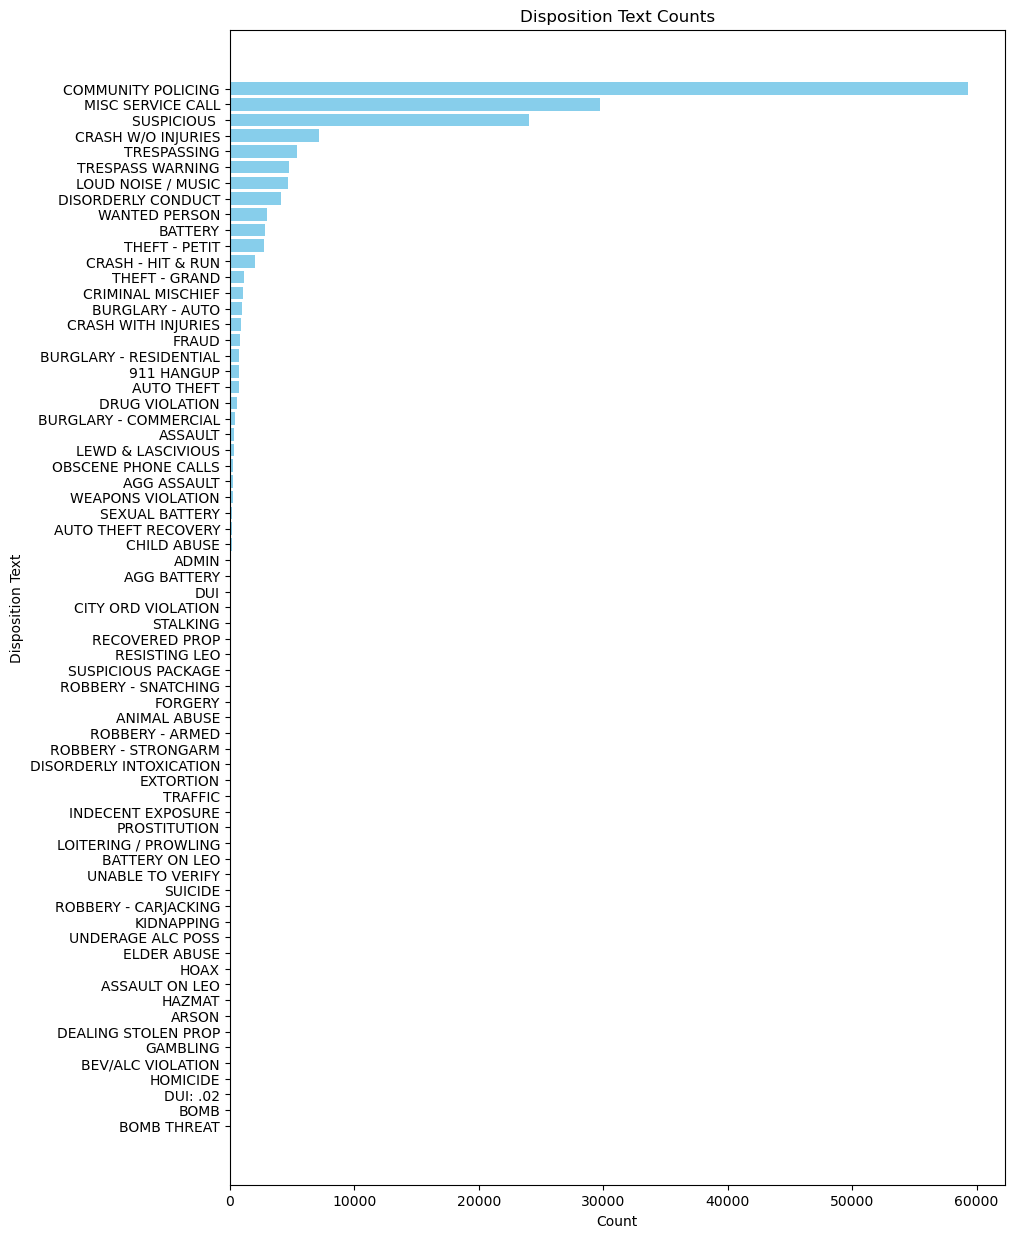

In [79]:
# Sort the DataFrame by count to make the chart easier to read
df_sorted = df.sort_values(by="count", ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 15))
plt.barh(df_sorted['DISPO_TEXT'], df_sorted['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Disposition Text')
plt.title('Disposition Text Counts')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()

In [80]:
# Log all the values so they are not so large and difficult to display all at once
df_new = df_sorted # make a copy
df_new['count'] = df_new['count']+ 9
df_new['count'] = np.log(df_new['count'])
# Take the ceiling
# df_sorted['count'] = np.ceil(df_sorted['count'])
df_new

,DISPO_TEXT,count
0,COMMUNITY POLICING,10.990499
1,MISC SERVICE CALL,10.301894
2,SUSPICIOUS,10.087474
3,CRASH W/O INJURIES,8.877382
4,TRESPASSING,8.593413
...,...,...
62,BEV/ALC VIOLATION,2.639057
63,HOMICIDE,2.639057
64,DUI: .02,2.484907
65,BOMB,2.397895


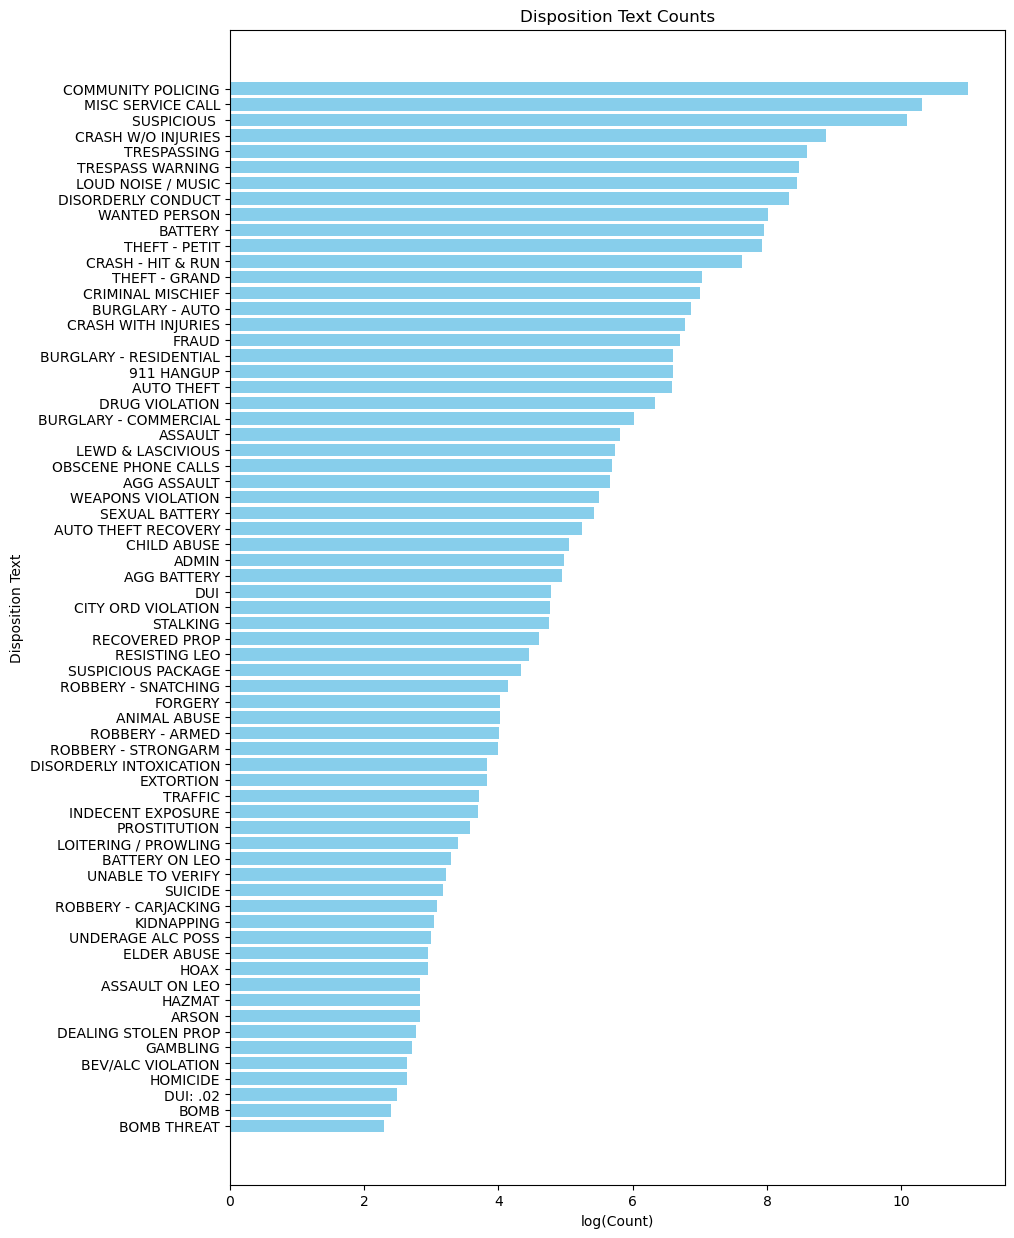

In [81]:
# Bar chart with log values
# Sort the DataFrame by count to make the chart easier to read
# df_sorted = df_sorted.sort_values(by="count", ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 15))
plt.barh(df_sorted['DISPO_TEXT'], df_sorted['count'], color='skyblue')
plt.xlabel('log(Count)')
plt.ylabel('Disposition Text')
plt.title('Disposition Text Counts')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()

## When did the Bomb and Bomb threat occur?

In [82]:
df = MERGEDALL
df

,CREATE_TIME_INCIDENT,LOCATION_TEXT,BEAT,REPORT_NUMBER,LEGEND2,DISPO_TEXT,OBJECTID,geometry
0,2023-11-10 21:12:47,None,18,2023-00196053,122,DISORDERLY INTOXICATION,1,POINT (-9386627.75200 3565111.39140)
1,2023-08-31 01:41:41,None,17,None,152,SUSPICIOUS,2,POINT (-9388266.65440 3561752.12860)
2,2023-08-01 16:23:09,None,4,2023-00132523,104,AUTO THEFT,3,POINT (-9376397.42740 3566294.16600)
3,2023-09-01 00:20:51,PLANTATION CONDOS,14,None,152,SUSPICIOUS,4,POINT (-9386699.50640 3560238.44430)
4,2023-09-29 17:56:38,None,8,2023-00170694,302,CRASH WITH INJURIES,5,POINT (-9376069.55250 3558656.45000)
...,...,...,...,...,...,...,...,...
161193,2024-01-28 13:47:23,AENON BAPTIST CHURCH,SW1,None,505,COMMUNITY POLICING,331,POINT (-9393031.19420 3559657.23630)
161194,2024-01-28 20:29:36,AMAZON FULFILLMENT CENTER,NE4,None,505,COMMUNITY POLICING,332,POINT (-9369634.07030 3566571.91980)
161195,2024-01-28 20:31:11,None,SE2,None,152,SUSPICIOUS,333,POINT (-9366706.13170 3555347.64320)
161196,2024-01-28 20:36:09,None,SW3,None,159,MISC SERVICE CALL,334,POINT (-9382658.75470 3553705.96660)


In [83]:
index_when = df[df['DISPO_TEXT'] == 'BOMB'].index.tolist()
index_when_threat = indices = df[df['DISPO_TEXT'] == 'BOMB THREAT'].index.tolist()

In [84]:
# Outputs dates when bomb was reported
MERGEDALL.iloc[index_when]['CREATE_TIME_INCIDENT']

12520   2023-02-24 10:01:03
40582   2023-02-15 17:24:11
Name: CREATE_TIME_INCIDENT, dtype: datetime64[ns]

In [85]:
# Location Text not available but coordinates are
MERGEDALL.iloc[index_when]

,CREATE_TIME_INCIDENT,LOCATION_TEXT,BEAT,REPORT_NUMBER,LEGEND2,DISPO_TEXT,OBJECTID,geometry
12520,2023-02-24 10:01:03,None,15,2023-00035151,110,BOMB,12521,POINT (-9383122.49390 3560895.27570)
40582,2023-02-15 17:24:11,None,SW3,None,110,BOMB,40583,POINT (-9384015.11250 3552264.21010)


In [86]:
# Outputs dates when bomb threat was reported
MERGEDALL.iloc[index_when_threat]['CREATE_TIME_INCIDENT']

45842   2023-04-16 08:33:20
Name: CREATE_TIME_INCIDENT, dtype: datetime64[ns]

In [87]:
MERGEDALL.iloc[index_when_threat]

,CREATE_TIME_INCIDENT,LOCATION_TEXT,BEAT,REPORT_NUMBER,LEGEND2,DISPO_TEXT,OBJECTID,geometry
45842,2023-04-16 08:33:20,None,2,2023-00067361,111,BOMB THREAT,45843,POINT (-9372792.53380 3572597.71860)


## Bar Chart For Location

In [88]:
MERGEDALL

,CREATE_TIME_INCIDENT,LOCATION_TEXT,BEAT,REPORT_NUMBER,LEGEND2,DISPO_TEXT,OBJECTID,geometry
0,2023-11-10 21:12:47,None,18,2023-00196053,122,DISORDERLY INTOXICATION,1,POINT (-9386627.75200 3565111.39140)
1,2023-08-31 01:41:41,None,17,None,152,SUSPICIOUS,2,POINT (-9388266.65440 3561752.12860)
2,2023-08-01 16:23:09,None,4,2023-00132523,104,AUTO THEFT,3,POINT (-9376397.42740 3566294.16600)
3,2023-09-01 00:20:51,PLANTATION CONDOS,14,None,152,SUSPICIOUS,4,POINT (-9386699.50640 3560238.44430)
4,2023-09-29 17:56:38,None,8,2023-00170694,302,CRASH WITH INJURIES,5,POINT (-9376069.55250 3558656.45000)
...,...,...,...,...,...,...,...,...
161193,2024-01-28 13:47:23,AENON BAPTIST CHURCH,SW1,None,505,COMMUNITY POLICING,331,POINT (-9393031.19420 3559657.23630)
161194,2024-01-28 20:29:36,AMAZON FULFILLMENT CENTER,NE4,None,505,COMMUNITY POLICING,332,POINT (-9369634.07030 3566571.91980)
161195,2024-01-28 20:31:11,None,SE2,None,152,SUSPICIOUS,333,POINT (-9366706.13170 3555347.64320)
161196,2024-01-28 20:36:09,None,SW3,None,159,MISC SERVICE CALL,334,POINT (-9382658.75470 3553705.96660)


In [89]:
# The number of different locations where incidents occurred
len(MERGEDALL['LOCATION_TEXT'].unique())

4143

In [90]:
MERGEDALL['LOCATION_TEXT'].value_counts()

LOCATION_TEXT
None                          71443
CIRCLE K                       3900
LEON CO DETENTION FACILITY     1451
PUBLIX SUPER MARKET            1113
WAL-MART SUPERCENTER           1047
                              ...  
CLOTHESLINE                       1
TCC LEARNING COMMONS              1
FLORIDA LOTTERY                   1
TALLY MAC SHACK                   1
I AM KOUTURE                      1
Name: count, Length: 4142, dtype: int64

In [91]:
# Let's assume 's' is the series obtained from value_counts()
s_loc = MERGEDALL['LOCATION_TEXT'].value_counts()

# Convert the series to a DataFrame and reset the index
df_location = s_loc.reset_index()
df_location.columns = ['LOCATION_TEXT', 'count']  # Rename the columns appropriately

# Now 'df' should have the structure you want
df_location


,LOCATION_TEXT,count
0,None,71443
1,CIRCLE K,3900
2,LEON CO DETENTION FACILITY,1451
3,PUBLIX SUPER MARKET,1113
4,WAL-MART SUPERCENTER,1047
...,...,...
4137,CLOTHESLINE,1
4138,TCC LEARNING COMMONS,1
4139,FLORIDA LOTTERY,1
4140,TALLY MAC SHACK,1


In [92]:
df_location_withoutNONE = df_location.iloc[1:]
first_one_hundered = df_location_withoutNONE.iloc[:100]
first_one_hundered

,LOCATION_TEXT,count
1,CIRCLE K,3900
2,LEON CO DETENTION FACILITY,1451
3,PUBLIX SUPER MARKET,1113
4,WAL-MART SUPERCENTER,1047
5,DOLLAR GENERAL,971
...,...,...
96,ROSS DRESS FOR LESS,142
97,HOLTON APTS,140
98,TMH EMERGENCY ROOM,139
99,CUSTOM CARE DRY CLEANERS,139


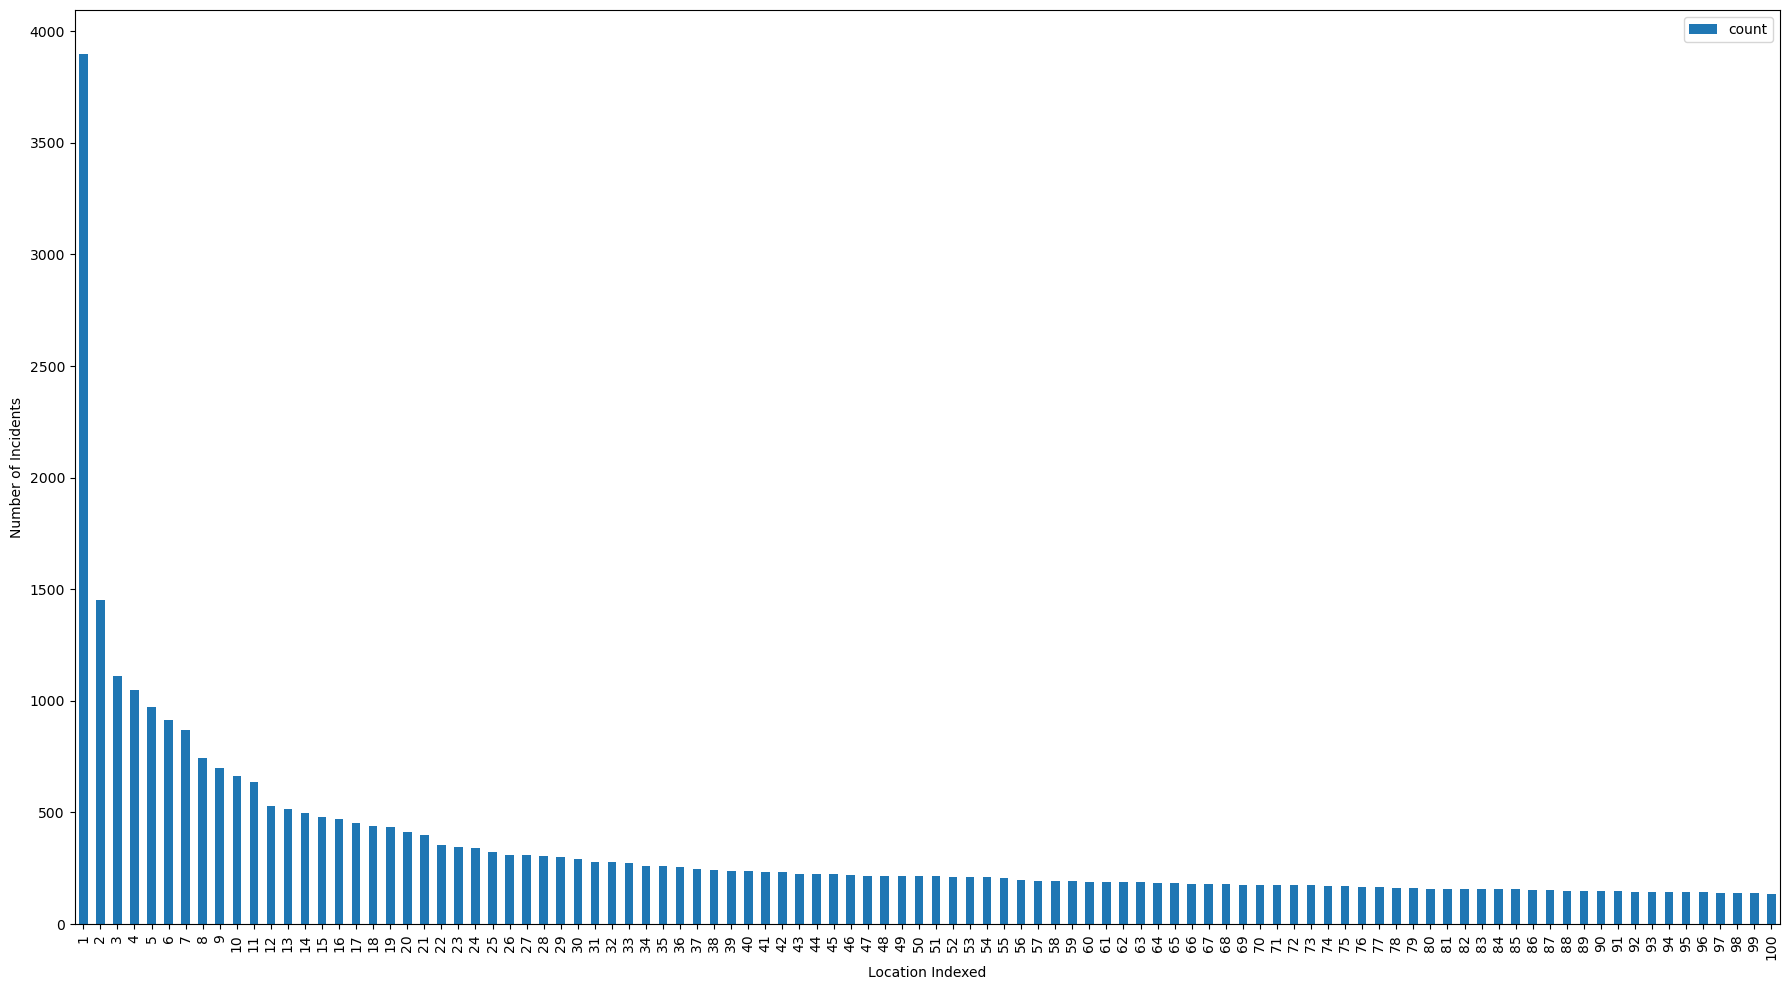

In [93]:
first_one_hundered.plot(kind='bar', figsize=(18, 10))
# plt.xticks(rotation=45)  # Rotate the x-axis labels to show them more clearly
plt.xlabel('Location Indexed')
plt.ylabel('Number of Incidents')
plt.tight_layout()  # Adjust the layout so everything fits without overlapping
plt.show()

In [94]:
# List of days in which an incident occured at CIRCLE K
indices = df[df['LOCATION_TEXT'] == 'CIRCLE K'].index.tolist()
indices

[16,
 238,
 251,
 282,
 358,
 362,
 506,
 513,
 539,
 542,
 549,
 737,
 768,
 793,
 932,
 941,
 963,
 1071,
 1072,
 1144,
 1169,
 1183,
 1215,
 1398,
 1427,
 1450,
 1530,
 1547,
 1562,
 1632,
 1639,
 1689,
 1711,
 1744,
 1751,
 1771,
 1813,
 1820,
 1829,
 1854,
 1855,
 1874,
 1900,
 1943,
 1963,
 2022,
 2040,
 2085,
 2095,
 2131,
 2134,
 2191,
 2196,
 2272,
 2324,
 2332,
 2336,
 2357,
 2504,
 2508,
 2548,
 2574,
 2615,
 2672,
 2697,
 2749,
 2845,
 2874,
 2897,
 2904,
 2906,
 2907,
 2940,
 2942,
 2945,
 2974,
 3073,
 3084,
 3124,
 3169,
 3185,
 3226,
 3282,
 3298,
 3350,
 3356,
 3513,
 3702,
 3714,
 3818,
 3846,
 3882,
 3933,
 3971,
 3976,
 4055,
 4109,
 4148,
 4189,
 4212,
 4226,
 4265,
 4285,
 4301,
 4315,
 4318,
 4326,
 4330,
 4351,
 4365,
 4380,
 4412,
 4435,
 4551,
 4558,
 4589,
 4605,
 4620,
 4743,
 4752,
 4808,
 4875,
 4985,
 4993,
 5046,
 5071,
 5188,
 5328,
 5346,
 5357,
 5409,
 5432,
 5502,
 5525,
 5622,
 5637,
 5644,
 5658,
 5671,
 5687,
 5737,
 5748,
 5766,
 5790,
 5946,
 59

In [95]:
# List of days in which an incident occured at PUBLIX
indices_p = df[df['LOCATION_TEXT'] == 'PUBLIX SUPER MARKET'].index.tolist()
indices_p

[118,
 146,
 317,
 386,
 667,
 709,
 772,
 976,
 988,
 993,
 1596,
 1644,
 2038,
 2132,
 2420,
 2468,
 2471,
 2671,
 2688,
 2724,
 2777,
 2813,
 2840,
 3030,
 3273,
 3299,
 3409,
 3455,
 3673,
 3720,
 4214,
 4239,
 4325,
 4537,
 4762,
 4986,
 5034,
 5309,
 5340,
 5929,
 6146,
 6431,
 6536,
 6571,
 6717,
 6830,
 6860,
 7182,
 7228,
 7236,
 7262,
 7392,
 7690,
 7695,
 8180,
 8391,
 8505,
 8651,
 8754,
 8807,
 9196,
 9214,
 9543,
 10426,
 10543,
 10850,
 10909,
 11136,
 11384,
 11491,
 11644,
 11694,
 11820,
 12335,
 12339,
 12641,
 12679,
 12784,
 12831,
 13023,
 13135,
 13259,
 13365,
 13387,
 13750,
 14226,
 14308,
 14607,
 14882,
 15300,
 15324,
 15425,
 15650,
 15871,
 15874,
 16013,
 16219,
 16283,
 16659,
 17142,
 17161,
 17327,
 17402,
 17408,
 17411,
 18337,
 18341,
 18637,
 18965,
 19372,
 19378,
 19824,
 19835,
 20622,
 21340,
 21839,
 22148,
 22411,
 22577,
 22760,
 23272,
 23287,
 23724,
 24045,
 24252,
 24623,
 24763,
 24944,
 25069,
 25276,
 25338,
 25418,
 25499,
 25529,
 

In [96]:
# Types of report at reported at Publix
MERGEDALL.iloc[indices_p]['DISPO_TEXT'].value_counts()

DISPO_TEXT
COMMUNITY POLICING     491
SUSPICIOUS             151
TRESPASSING            100
MISC SERVICE CALL      100
TRESPASS WARNING        69
CRASH W/O INJURIES      67
THEFT - PETIT           45
CRASH - HIT & RUN       26
DISORDERLY CONDUCT      10
THEFT - GRAND            8
WANTED PERSON            7
CRIMINAL MISCHIEF        6
FRAUD                    5
CRASH WITH INJURIES      5
BATTERY                  5
911 HANGUP               4
BURGLARY - AUTO          3
LOUD NOISE / MUSIC       2
AGG ASSAULT              2
ASSAULT                  2
AUTO THEFT               1
STALKING                 1
UNABLE TO VERIFY         1
DRUG VIOLATION           1
CHILD ABUSE              1
Name: count, dtype: int64

In [97]:
# List of days an incident happened at Walmart
indices_w = df[df['LOCATION_TEXT'] == 'WAL-MART SUPERCENTER'].index.tolist()
indices_w

[57,
 208,
 214,
 256,
 301,
 374,
 477,
 625,
 645,
 1124,
 1271,
 1323,
 1624,
 1719,
 1972,
 2100,
 2106,
 2319,
 2563,
 3465,
 3571,
 3796,
 4027,
 4032,
 4117,
 4125,
 4146,
 4240,
 4313,
 4588,
 4705,
 5186,
 5367,
 5559,
 5801,
 5805,
 5856,
 6362,
 6415,
 6600,
 6899,
 6918,
 6936,
 7000,
 7065,
 7072,
 7074,
 7080,
 7114,
 7200,
 7775,
 7894,
 7989,
 8732,
 8804,
 8924,
 9064,
 9290,
 9381,
 9570,
 10205,
 10662,
 10742,
 10925,
 11073,
 11639,
 11733,
 11741,
 12472,
 12653,
 12681,
 12939,
 13544,
 13708,
 13951,
 13959,
 14054,
 14060,
 14167,
 14280,
 14459,
 14498,
 14767,
 15640,
 15886,
 15951,
 16117,
 16125,
 16213,
 16607,
 16662,
 17112,
 17341,
 17491,
 17841,
 18999,
 19374,
 20153,
 20611,
 20636,
 20846,
 20931,
 22070,
 22732,
 22927,
 23001,
 23143,
 23289,
 23320,
 24021,
 24345,
 24363,
 24701,
 25020,
 25055,
 25120,
 25626,
 25689,
 25886,
 25974,
 25989,
 25990,
 26002,
 26069,
 26075,
 26169,
 26357,
 26467,
 27108,
 27490,
 27491,
 27650,
 28133,
 28446

In [98]:
# Types of reports at Walmart
MERGEDALL.iloc[indices_w]['DISPO_TEXT'].value_counts()

DISPO_TEXT
COMMUNITY POLICING        387
TRESPASS WARNING          152
THEFT - PETIT             145
SUSPICIOUS                125
MISC SERVICE CALL          84
TRESPASSING                53
THEFT - GRAND              18
CRASH W/O INJURIES         18
CRASH - HIT & RUN          14
DISORDERLY CONDUCT         10
WANTED PERSON               7
BATTERY                     6
911 HANGUP                  5
FRAUD                       5
CRASH WITH INJURIES         5
BURGLARY - AUTO             3
LOUD NOISE / MUSIC          3
RESISTING LEO               1
ROBBERY - SNATCHING         1
FORGERY                     1
AUTO THEFT                  1
CITY ORD VIOLATION          1
BURGLARY - RESIDENTIAL      1
SUSPICIOUS PACKAGE          1
Name: count, dtype: int64

In [99]:
MERGEDALL.iloc[indices]['DISPO_TEXT'].value_counts()

DISPO_TEXT
COMMUNITY POLICING       2434
SUSPICIOUS                416
TRESPASSING               293
MISC SERVICE CALL         243
TRESPASS WARNING          203
THEFT - PETIT              90
DISORDERLY CONDUCT         48
CRASH W/O INJURIES         37
BATTERY                    23
WANTED PERSON              14
THEFT - GRAND              14
CRASH - HIT & RUN          13
LOUD NOISE / MUSIC         13
FRAUD                      10
DRUG VIOLATION              5
BURGLARY - COMMERCIAL       4
CRIMINAL MISCHIEF           4
ASSAULT                     4
AUTO THEFT                  4
AGG ASSAULT                 3
911 HANGUP                  2
BURGLARY - AUTO             2
INDECENT EXPOSURE           2
AGG BATTERY                 2
ROBBERY - SNATCHING         2
LEWD & LASCIVIOUS           2
CRASH WITH INJURIES         2
SUICIDE                     2
DUI                         2
RECOVERED PROP              1
BATTERY ON LEO              1
HOAX                        1
SUSPICIOUS PACKAGE          1

Normalize the count of suspicious activity for example considering how many walmarts/circle ks there are in tallahassee.
Maybe we should normalize for number of people instead of places.

In [100]:
MERGEDALL

,CREATE_TIME_INCIDENT,LOCATION_TEXT,BEAT,REPORT_NUMBER,LEGEND2,DISPO_TEXT,OBJECTID,geometry
0,2023-11-10 21:12:47,None,18,2023-00196053,122,DISORDERLY INTOXICATION,1,POINT (-9386627.75200 3565111.39140)
1,2023-08-31 01:41:41,None,17,None,152,SUSPICIOUS,2,POINT (-9388266.65440 3561752.12860)
2,2023-08-01 16:23:09,None,4,2023-00132523,104,AUTO THEFT,3,POINT (-9376397.42740 3566294.16600)
3,2023-09-01 00:20:51,PLANTATION CONDOS,14,None,152,SUSPICIOUS,4,POINT (-9386699.50640 3560238.44430)
4,2023-09-29 17:56:38,None,8,2023-00170694,302,CRASH WITH INJURIES,5,POINT (-9376069.55250 3558656.45000)
...,...,...,...,...,...,...,...,...
161193,2024-01-28 13:47:23,AENON BAPTIST CHURCH,SW1,None,505,COMMUNITY POLICING,331,POINT (-9393031.19420 3559657.23630)
161194,2024-01-28 20:29:36,AMAZON FULFILLMENT CENTER,NE4,None,505,COMMUNITY POLICING,332,POINT (-9369634.07030 3566571.91980)
161195,2024-01-28 20:31:11,None,SE2,None,152,SUSPICIOUS,333,POINT (-9366706.13170 3555347.64320)
161196,2024-01-28 20:36:09,None,SW3,None,159,MISC SERVICE CALL,334,POINT (-9382658.75470 3553705.96660)


In [101]:
column = MERGEDALL.columns[0]
IncidentNumbersDescending = MERGEDALL[column].dt.date.value_counts()
IncidentNumbersDescending.index = pd.to_datetime(IncidentNumbersDescending.index)
n_incidents = IncidentNumbersDescending.resample('H').sum()
n_incidents


CREATE_TIME_INCIDENT
2023-01-02 00:00:00     41
2023-01-02 01:00:00      0
2023-01-02 02:00:00      0
2023-01-02 03:00:00      0
2023-01-02 04:00:00      0
                      ... 
2024-01-28 20:00:00      0
2024-01-28 21:00:00      0
2024-01-28 22:00:00      0
2024-01-28 23:00:00      0
2024-01-29 00:00:00    410
Freq: H, Name: count, Length: 9409, dtype: int64

In [456]:
# Make a function that will extract months that corresponds to max and min number of incidents
def MaxMinIncidentMonth(PandaFrame):
    column = PandaFrame.columns[0] #CREATE_TIME_INCIDENT COLUMN
    IncidentNumbersDescending = PandaFrame[column].dt.date.value_counts()
    # Convert the index to a DateTimeIndex
    IncidentNumbersDescending.index = pd.to_datetime(IncidentNumbersDescending.index)
    # Resample to weekly frequency, summing the number of incidents.
    monthly_incidents = IncidentNumbersDescending.resample('M').sum()
    # Now find the week with the maximum number of incidents.
    max_incidents_month = monthly_incidents.idxmax()
    # Similarly find the week with the minumum number of incidents
    min_incidents_month = monthly_incidents.idxmin()
    
    return (max_incidents_month,min_incidents_month)


# Comments on Feb 28

1. Geopandas cannot plot maps. So we will need other libraries. Mao will work on it (Folium).
2. Figure out the hourly distribution.
3. Clean the notebook.
4. Put comments for each cell.
5. Make a log bar chart

## Excluding Community Policing From the Analysis

In [102]:
# Extract data points without community policing
WCP = MERGEDALL[MERGEDALL['DISPO_TEXT'] != 'COMMUNITY POLICING']
WCP

,CREATE_TIME_INCIDENT,LOCATION_TEXT,BEAT,REPORT_NUMBER,LEGEND2,DISPO_TEXT,OBJECTID,geometry
0,2023-11-10 21:12:47,None,18,2023-00196053,122,DISORDERLY INTOXICATION,1,POINT (-9386627.75200 3565111.39140)
1,2023-08-31 01:41:41,None,17,None,152,SUSPICIOUS,2,POINT (-9388266.65440 3561752.12860)
2,2023-08-01 16:23:09,None,4,2023-00132523,104,AUTO THEFT,3,POINT (-9376397.42740 3566294.16600)
3,2023-09-01 00:20:51,PLANTATION CONDOS,14,None,152,SUSPICIOUS,4,POINT (-9386699.50640 3560238.44430)
4,2023-09-29 17:56:38,None,8,2023-00170694,302,CRASH WITH INJURIES,5,POINT (-9376069.55250 3558656.45000)
...,...,...,...,...,...,...,...,...
161186,2024-01-28 21:58:47,CIRCLE K,1,2024-00016372,146,THEFT - PETIT,324,POINT (-9378627.68330 3569037.40910)
161187,2024-01-29 00:55:42,CIRCLE K,17,None,152,SUSPICIOUS,325,POINT (-9391746.53840 3562502.38510)
161189,2024-01-29 01:01:33,MCDONALDS,15,None,152,SUSPICIOUS,327,POINT (-9383527.14910 3560893.23170)
161195,2024-01-28 20:31:11,None,SE2,None,152,SUSPICIOUS,333,POINT (-9366706.13170 3555347.64320)


In [104]:
WCP['DISPO_TEXT'].value_counts()

DISPO_TEXT
MISC SERVICE CALL     29780
SUSPICIOUS            24031
CRASH W/O INJURIES     7159
TRESPASSING            5387
TRESPASS WARNING       4757
                      ...  
BEV/ALC VIOLATION         5
HOMICIDE                  5
DUI: .02                  3
BOMB                      2
BOMB THREAT               1
Name: count, Length: 66, dtype: int64

In [106]:
MERGEDALL['LOCATION_TEXT'].value_counts()

LOCATION_TEXT
None                          71443
CIRCLE K                       3900
LEON CO DETENTION FACILITY     1451
PUBLIX SUPER MARKET            1113
WAL-MART SUPERCENTER           1047
                              ...  
CLOTHESLINE                       1
TCC LEARNING COMMONS              1
FLORIDA LOTTERY                   1
TALLY MAC SHACK                   1
I AM KOUTURE                      1
Name: count, Length: 4142, dtype: int64

In [105]:
WCP['LOCATION_TEXT'].value_counts()

LOCATION_TEXT
None                              53193
CIRCLE K                           1466
LEON CO DETENTION FACILITY         1451
LEON CO SHERIFFS OFFICE             863
TALLAHASSEE POLICE DEPARTMENT       841
                                  ...  
ST PETERS PB CHURCH                   1
J R ALFORD ARM GREENWAY               1
PAWS & CLAWS VETERINARY CLINIC        1
PREMIER HOMES                         1
HEMATOLOGY ONCOLOGY SOLUTIONS         1
Name: count, Length: 3447, dtype: int64

In [107]:
# Let's assume 's' is the series obtained from value_counts()
s_loc = WCP['LOCATION_TEXT'].value_counts()

# Convert the series to a DataFrame and reset the index
WCP_location = s_loc.reset_index()
WCP_location.columns = ['LOCATION_TEXT', 'count']  # Rename the columns appropriately

# Now 'df' should have the structure you want
WCP_location


,LOCATION_TEXT,count
0,None,53193
1,CIRCLE K,1466
2,LEON CO DETENTION FACILITY,1451
3,LEON CO SHERIFFS OFFICE,863
4,TALLAHASSEE POLICE DEPARTMENT,841
...,...,...
3442,ST PETERS PB CHURCH,1
3443,J R ALFORD ARM GREENWAY,1
3444,PAWS & CLAWS VETERINARY CLINIC,1
3445,PREMIER HOMES,1


In [118]:
df = WCP_location.iloc[1:50]
df

,LOCATION_TEXT,count
1,CIRCLE K,1466
2,LEON CO DETENTION FACILITY,1451
3,LEON CO SHERIFFS OFFICE,863
4,TALLAHASSEE POLICE DEPARTMENT,841
5,LCSO,742
6,WAL-MART SUPERCENTER,660
7,PUBLIX SUPER MARKET,622
8,MCDONALDS,533
9,DOLLAR GENERAL,480
10,COMPREHENSIVE EMERGENCY SERVIC,442


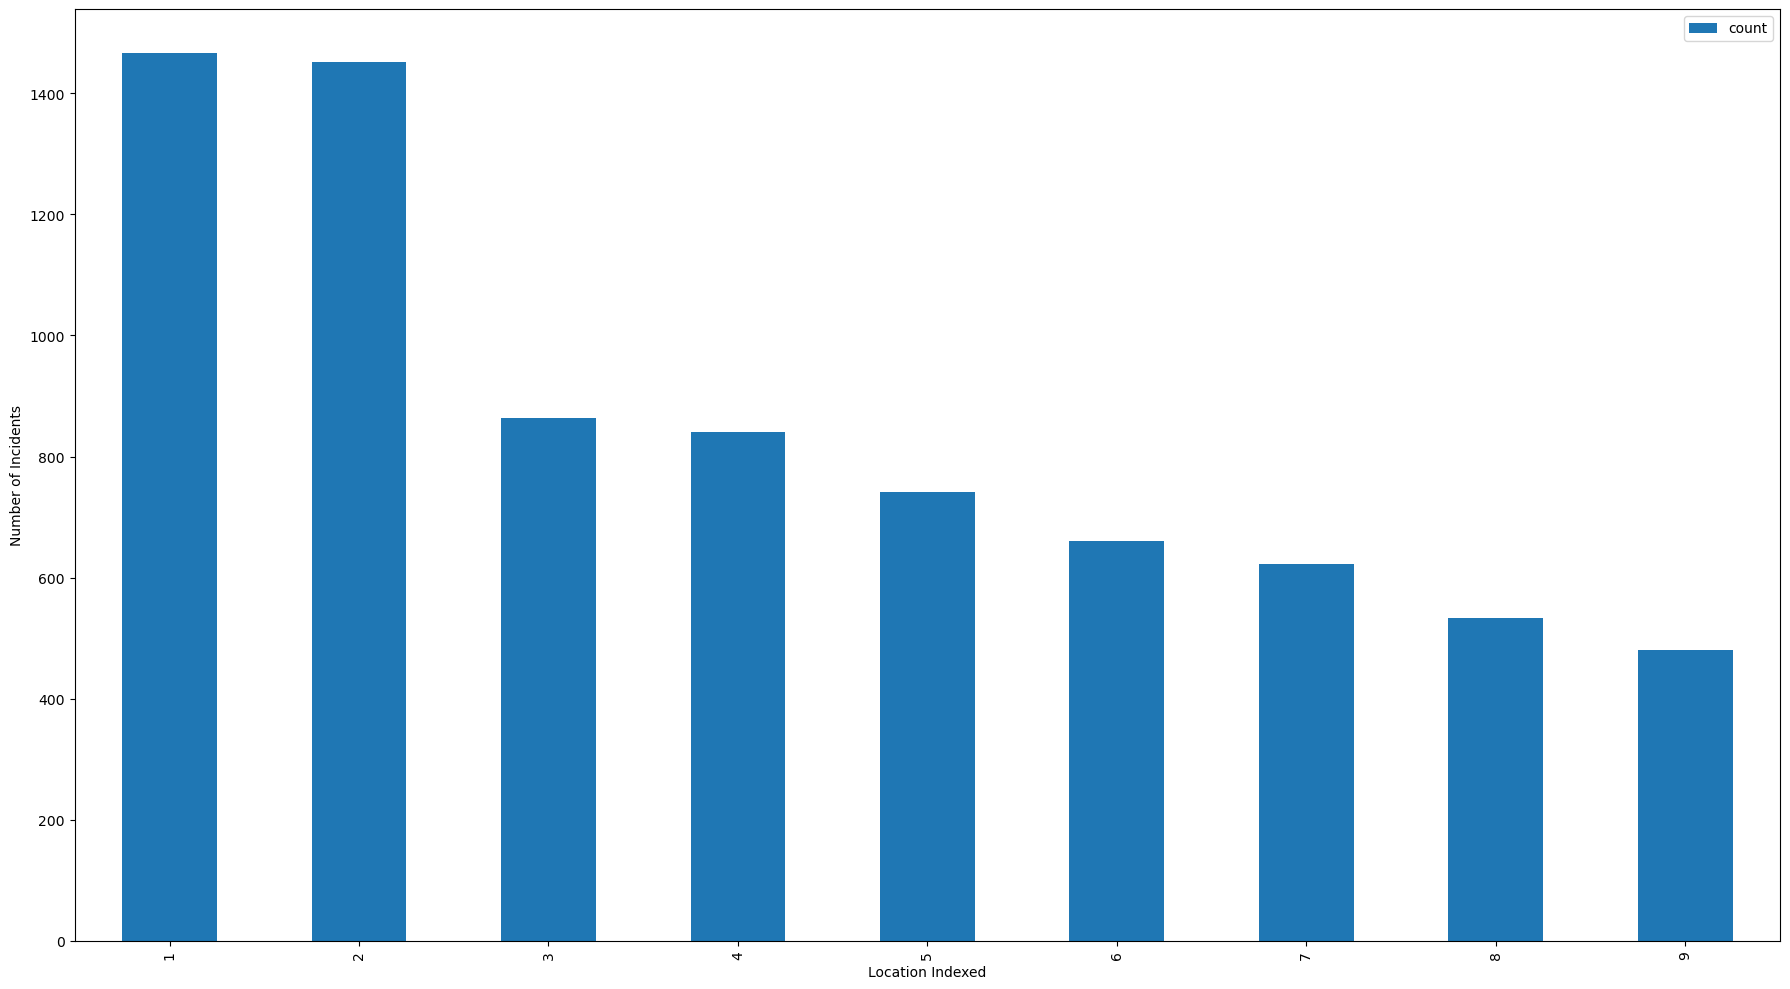

In [113]:
WCP_100.plot(kind='bar', figsize=(18, 10))
# plt.xticks(rotation=45)  # Rotate the x-axis labels to show them more clearly
plt.xlabel('Location Indexed')
plt.ylabel('Number of Incidents Without Community Policing')
plt.tight_layout()  # Adjust the layout so everything fits without overlapping
plt.show()

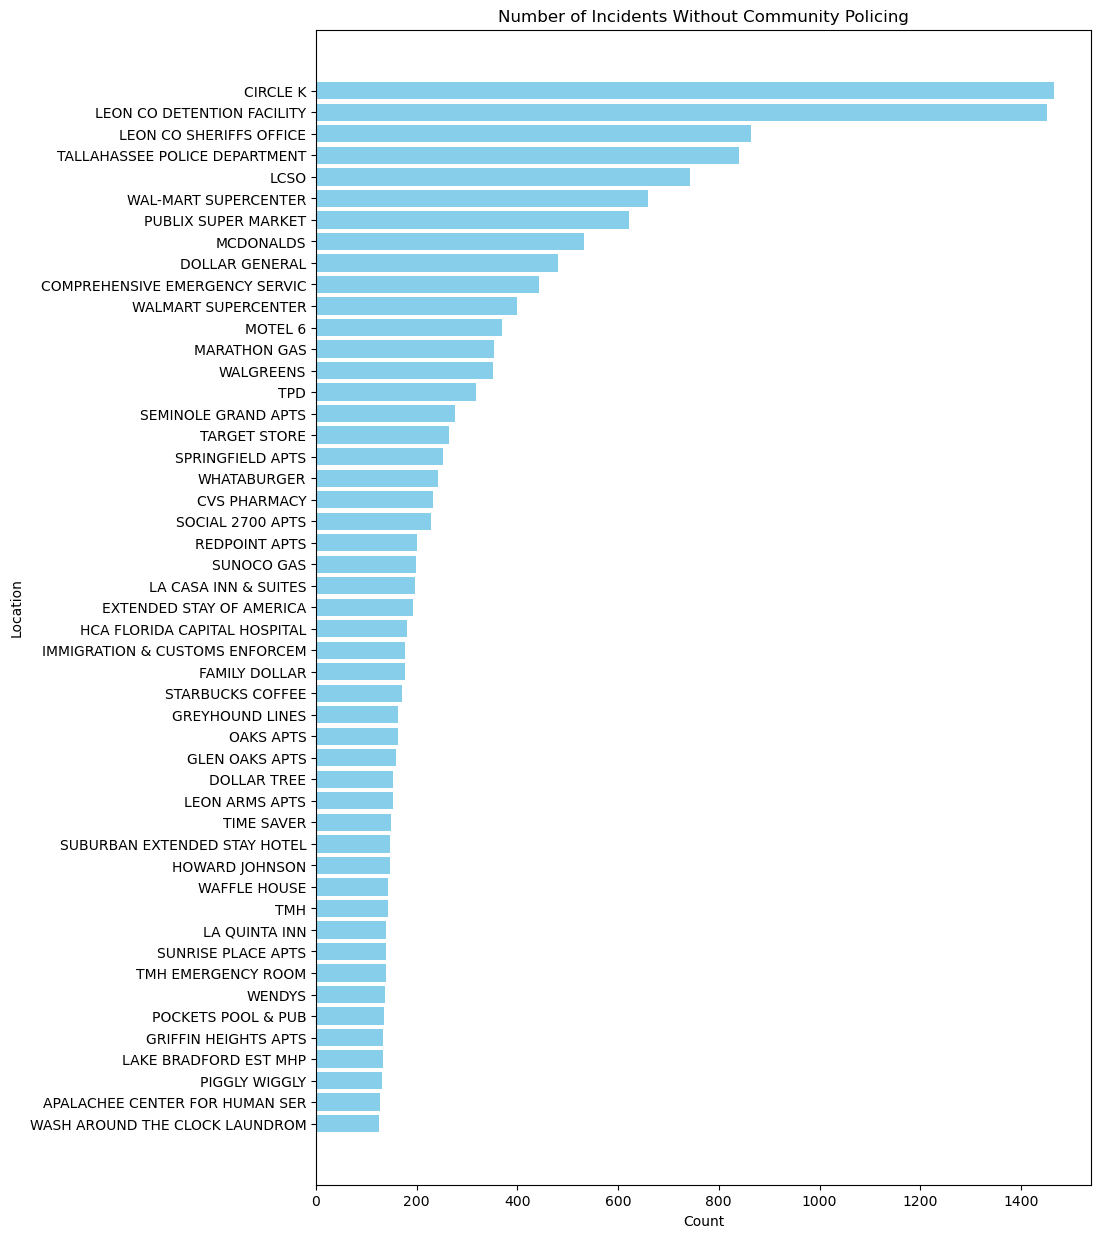

In [121]:
# Bar chart with log values
# Sort the DataFrame by count to make the chart easier to read
# df_sorted = df_sorted.sort_values(by="count", ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 15))
plt.barh(df['LOCATION_TEXT'],df['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Number of Incidents Without Community Policing')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()